In [129]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
students = pd.read_csv(r'C:\Users\eduardo\Documents\StudentPerformanceFactors.csv')
students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
def dividir_treino_teste(X, y, prop_teste=0.3, random_state=None):
    """
    divide o conjunto de dados em treino e teste
    """
    X_train = X.sample(frac=1-prop_teste, random_state=random_state)
    X_test = X.drop(X_train.index)
    y_train = y.loc[X_train.index]
    y_test = y.loc[X_test.index]
    return X_train, X_test, y_train, y_test


In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = students[['Hours_Studied', 'Attendance']]
y = students['Exam_Score']

X_train, X_test, y_train, y_test = dividir_treino_teste(X, y, prop_teste=0.3, random_state=1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
sklearn_y_pred = regr.predict(X_test)

In [19]:
X_train

,Hours_Studied,Attendance
4249,20,90
6250,17,81
961,28,74
2418,22,91
3463,26,90
...,...,...
2125,23,80
30,16,83
2306,24,99
1226,20,88


In [5]:
y_train

4249    70
6250    65
961     65
2418    69
3463    71
        ..
2125    66
30      63
2306    72
1226    68
2329    69
Name: Exam_Score, Length: 4625, dtype: int64

In [6]:
def reg_ols(X_train, y_train, intercepto=True):
    """
    retorna os betas da regressao linear com
    minimos quadrados ordinarios
    """
    x = X_train.copy()
    if intercepto:
        #adicionar intercepto
        if 'intercepto' not in x.columns:
            x['intercepto'] = 1
    else:
        #remover intercepto caso falso
        if 'intercepto' in x.columns:
            x = x.drop('intercepto', axis=1)

    #conversao de x e y para formatos adequados
    X = np.array(x)
    y = np.array(y_train).reshape(-1,1)

    # beta = (X^T * X)^(-1) * X^T * y
    X_transposto = X.T
    b = np.linalg.inv(X_transposto.dot(X)).dot(X_transposto).dot(y)
    return b

In [7]:
beta = reg_ols(X_train, y_train, intercepto=True)
print(beta)

[[ 0.29178043]
 [ 0.19864831]
 [45.52872936]]


In [8]:
beta_s_int = reg_ols(X_train, y_train, intercepto=False)
print(beta_s_int)

[[0.71982337]
 [0.65161116]]


In [9]:
def predict_ols(X_test, beta, intercepto=True):
    """
    retorna a predicao de valores novos
    """
    x = X_test.copy()
    #adicionar intercepto caso nao tenha
    if intercepto:
        if 'intercepto' not in x.columns:
            x['intercepto'] = 1

    #converter p array para op. matematicas
    X = np.array(x)
    predicoes = X.dot(beta)
    return predicoes

In [10]:
y_pred_train = predict_ols(X_train, beta, intercepto=True)
y_pred_train

array([[69.24268594],
       [66.57950985],
       [68.39855644],
       ...,
       [72.19764247],
       [68.84538932],
       [66.7286219 ]])

In [11]:
y_train

4249    70
6250    65
961     65
2418    69
3463    71
        ..
2125    66
30      63
2306    72
1226    68
2329    69
Name: Exam_Score, Length: 4625, dtype: int64

In [12]:
y_pred = predict_ols(X_test, beta, intercepto=True)
y_pred.shape

(1982, 1)

In [13]:
y_test.shape

(1982,)

In [27]:
def r2_ols(y_test, y_pred):
    """
    retorna o r2 score
    """
    #conversao p array e p mesmo shape
    y_test = np.array(y_test)
    y_pred = np.array(y_pred).flatten()
    
    #calculo do SSres
    SSres = np.sum((y_test - y_pred)**2)
    
    #calculo do SStot
    y_obs_mean = np.mean(y_test)
    SStot = np.sum((y_test-y_obs_mean)**2)

    #calculo do r2
    r2 = 1 - (SSres/SStot)
    return r2

def mse(y_test, y_pred):
    """
    retorna o erro quadratico medio
    """
    #conversao p array
    y_test = np.array(y_test)
    y_pred = np.array(y_pred).flatten()
    return np.mean((y_test - y_pred) ** 2)

In [57]:
r2_treino = r2_ols(y_train, y_pred_train)
mse_treino = mse(y_train, y_pred_train)
r2_teste = r2_ols(y_test, y_pred)
mse_teste = mse(y_test, y_pred)

print('---- modelo manual ----')
print('intercepto:', beta[2])
print('coeficientes:', beta[0], beta[1])
print(f'mse (conj. teste): {mse_teste:.2f}')
print(f'r2 score (conj. teste): {r2_teste:.2f}')
print('----'*6)
print('---- modelo sklearn ----')
print('intercepto:', np.round(regr.intercept_,8))
print('coeficientes:', regr.coef_)
print(f'mse (conj. teste): {mean_squared_error(y_test, sklearn_y_pred):.2f}')
print(f'r2 score (conj. teste) {r2_score(y_test, sklearn_y_pred):.2f}')
print('----'*6)

---- modelo manual ----
intercepto: [45.52872936]
coeficientes: [0.29178043] [0.19864831]
mse (conj. teste): 6.52
r2 score (conj. teste): 0.56
------------------------
---- modelo sklearn ----
intercepto: 45.52872936
coeficientes: [0.29178043 0.19864831]
mse (conj. teste): 6.52
r2 score (conj. teste) 0.56
------------------------


In [72]:
eixo_x = X_test.iloc[:,0].values
eixo_y = X_test.iloc[:,1].values
eixo_z_teste = y_test.values
eixo_z_predito = y_pred.flatten()

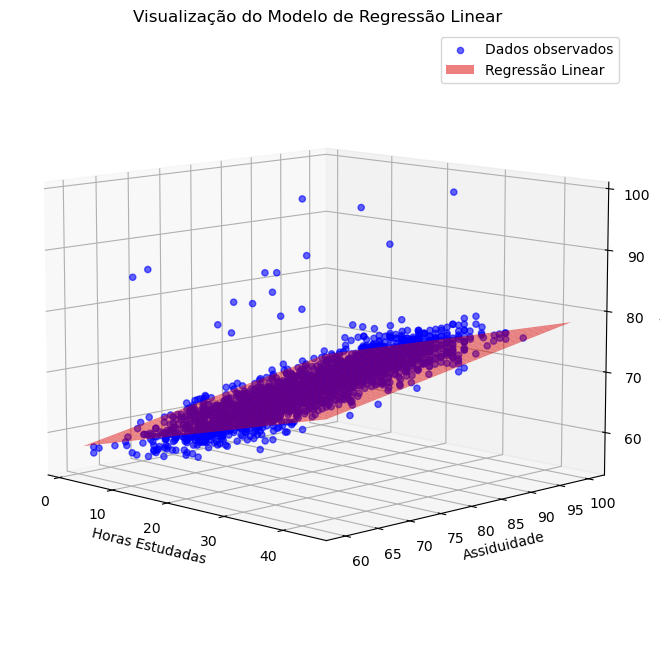

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# figura 3d do matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatterplot dos dados observados
ax.scatter(eixo_x, eixo_y, eixo_z_teste, color='blue', label='Dados observados', alpha=0.6)

# Create a grid of values over the range of X1 and X2
X1_grid, X2_grid = np.meshgrid(
    np.linspace(eixo_x.min(), eixo_x.max(), 50),
    np.linspace(eixo_y.min(), eixo_y.max(), 50)
)

# Compute the corresponding Z values using the regression coefficients
# Extract coefficients from your model
intercept = beta[2]       # Intercept term
coef1 = beta[0]           # Coefficient for X1
coef2 = beta[1]           # Coefficient for X2

# Calculate predicted Z values over the grid
Z_grid = intercept + coef1 * X1_grid + coef2 * X2_grid

# Plot the regression plane
ax.plot_surface(X1_grid, X2_grid, Z_grid, color='red', alpha=0.5, rstride=1, cstride=1, edgecolor='none', label='Regressão Linear')

# Set labels
ax.set_xlabel('Horas Estudadas')
ax.set_ylabel('Assiduidade')
ax.set_zlabel('Nota Final')

# Set a title
ax.set_title('Visualização do Modelo de Regressão Linear')

# Add a legend
ax.legend()

# Adjust the viewing angle for better visualization
ax.view_init(elev=10, azim=-45)

# Show the plot
plt.show()

In [128]:
import plotly.graph_objects as go

layout = go.Layout(
    title='Visualização 3D da Regressão Linear',
    width=800,
    height=600,
    scene=dict(
        xaxis_title='Horas Estudadas',
        yaxis_title='Assiduidade',
        zaxis_title='Nota Final'
    )
)

fig = go.Figure(data=[go.Scatter3d(x=eixo_x, 
                                   y=eixo_y, 
                                   z=eixo_z_teste,
                                   marker=dict(
                                       size=6,
                                       color=eixo_z_teste,
                                       colorscale='Viridis',   
                                       opacity=0.5),
                                   mode='markers'),
                     go.Surface(x=X1_grid, y=X2_grid, z=Z_grid, opacity=0.5)],
               layout=layout)
fig.update_layout(margin=dict(l=0, r=0, b=0))
fig.show()